In [36]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data=pd.read_csv("data3.csv")

In [24]:
data['fraudulent'] = data['fraudulent'].map({'f': 0, 't': 1})


In [25]:
# More comprehensive text preprocessing
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Add custom stopwords specific to job postings
job_stopwords = {'company', 'position', 'candidate', 'work', 'job', 'role', 'team'}
stop_words.update(job_stopwords)

data['text'] = data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
from sklearn.model_selection import train_test_split
# Splitting dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(data.text, data.fraudulent, test_size=0.3)

In [27]:
print(y_train)
print(X_train)

     

178     0
1553    1
37      0
1474    1
998     1
       ..
1478    1
1647    1
1162    1
1592    1
1191    1
Name: fraudulent, Length: 1210, dtype: int64
178     S70 2JB Business Admin Apprenticeship Availabl...
1553    Data Entry / Typist Work At Home US, TX, Houst...
37      Ad campaign coordinator LT, , Vilnius No profi...
1474    Human Resources Assistant/Executive Assistant/...
998     CUSTOMER SERVICE REPRESENTATIVE US, NY, No pro...
                              ...                        
1478    Hospital Clerical/Reception: $22 - $24/hr CA, ...
1647    Administrative Assistant US, MD, Baltimore No ...
1162    Home Based Commission Roles US, IN, No profile...
1592    Data Entry Admin/Clerical Positions - Work Fro...
1191    Mechanical Engineering Manager US, TX, Houston...
Name: text, Length: 1210, dtype: object


In [28]:
from sklearn.feature_extraction.text import CountVectorizer

#  instantiate the vectorizer
vect = CountVectorizer()

# learn training data vocabulary, then use it to create a document-term matrix
# fit
vect.fit(X_train)

# transform training data
X_train_dtm = vect.transform(X_train)


In [29]:

# examine the document-term matrix
X_train_dtm

#how X_train_dtm is looking
print(X_train_dtm)

  (0, 43)	1
  (0, 77)	2
  (0, 87)	2
  (0, 204)	1
  (0, 680)	3
  (0, 811)	1
  (0, 815)	1
  (0, 939)	1
  (0, 1086)	1
  (0, 1109)	1
  (0, 1179)	4
  (0, 1523)	3
  (0, 1641)	1
  (0, 2174)	3
  (0, 2283)	1
  (0, 2346)	2
  (0, 2772)	1
  (0, 2953)	1
  (0, 3078)	1
  (0, 3237)	1
  (0, 3451)	1
  (0, 3453)	1
  (0, 3463)	1
  (0, 3635)	1
  (0, 3653)	1
  :	:
  (1209, 13625)	1
  (1209, 13633)	1
  (1209, 13638)	1
  (1209, 13737)	2
  (1209, 14093)	1
  (1209, 14148)	1
  (1209, 14156)	1
  (1209, 14362)	1
  (1209, 14372)	1
  (1209, 14654)	2
  (1209, 14673)	1
  (1209, 14724)	1
  (1209, 14737)	1
  (1209, 14798)	1
  (1209, 14836)	2
  (1209, 14900)	1
  (1209, 14922)	1
  (1209, 15071)	2
  (1209, 15135)	2
  (1209, 15142)	1
  (1209, 15256)	2
  (1209, 15262)	1
  (1209, 15287)	1
  (1209, 15326)	1
  (1209, 15401)	2


In [30]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<519x15714 sparse matrix of type '<class 'numpy.int64'>'
	with 83380 stored elements in Compressed Sparse Row format>

## Model building

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [32]:
nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)

Wall time: 11.4 ms


MultinomialNB()

In [33]:
y_pred_nb = nb.predict(X_test_dtm)
print(y_pred_nb)
     

[0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0
 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0
 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0
 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0
 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0
 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0
 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1
 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1
 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1
 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0
 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0
 1 1 0 1 0 0 1 0 0 0 1 0 

In [34]:
accuracy_score(y_test, y_pred_nb)
print("Classification Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report\n")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_nb))

Classification Accuracy: 0.9017341040462428
Classification Report

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       263
           1       0.91      0.88      0.90       256

    accuracy                           0.90       519
   macro avg       0.90      0.90      0.90       519
weighted avg       0.90      0.90      0.90       519

Confusion Matrix

[[242  21]
 [ 30 226]]


Text(95.72222222222221, 0.5, 'Truth')

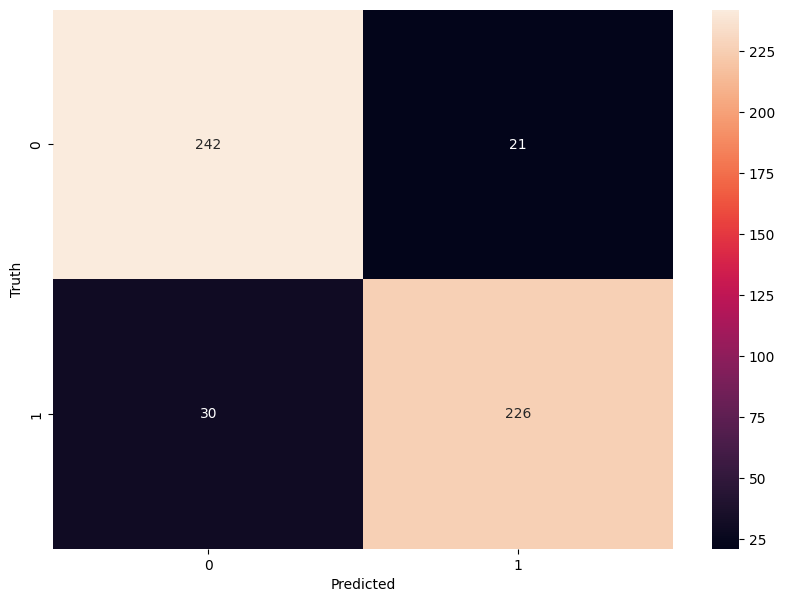

In [39]:
cm = confusion_matrix(y_test,y_pred_nb)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Decision Tree Classifier


In [41]:
dt = DecisionTreeClassifier()


In [42]:
%time dt.fit(X_train_dtm, y_train)

Wall time: 485 ms


DecisionTreeClassifier()

In [43]:
y_pred_class = dt.predict(X_test_dtm)

In [44]:

# Model Accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_pred_class))
print("Classification Report\n")
print(classification_report(y_test, y_pred_class))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_class))

Classification Accuracy: 0.8574181117533719
Classification Report

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       263
           1       0.84      0.88      0.86       256

    accuracy                           0.86       519
   macro avg       0.86      0.86      0.86       519
weighted avg       0.86      0.86      0.86       519

Confusion Matrix

[[221  42]
 [ 32 224]]


Text(95.72222222222221, 0.5, 'Truth')

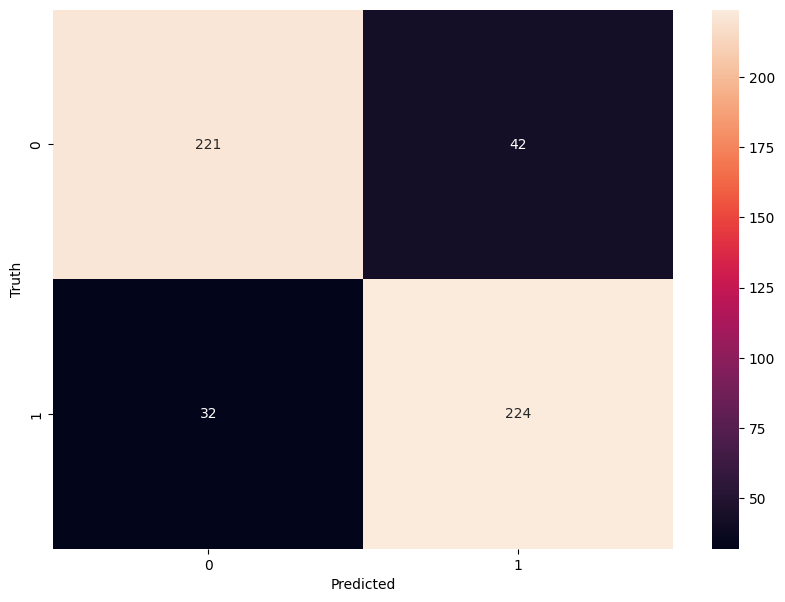

In [45]:
# Confusion Matrix

import seaborn as sn
cm = confusion_matrix(y_test,y_pred_class)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#random manuall testing

In [53]:
X_test

321     Support Worker (Personal Assistant) GB, EDH, E...
1674    Hiring Part-Time Workers (CASH PAYING) US, CA,...
45      Web Designer / Front End Developer GR, I, Athe...
1722    ADMINISTRATIVE & OFFICE ASSISTANT US, TX, Hous...
981     Customer Service Representative US, GA, Atlant...
                              ...                        
1211    Front-End Developer US, IN, Bloomington No pro...
452     Lucene / Elasticsearch Engineer DE, BE, Berlin...
1129    Market Specialists US, OH, Cincinnati Bradley ...
1687    Weekend Cash Jobs Part time & Full time. AU, N...
1708    Agency Sales Managers $150-$175,000/yr US, NY,...
Name: text, Length: 519, dtype: object

In [63]:
print(X_test[1674])

Hiring Part-Time Workers (CASH PAYING) US, CA, Los Angeles No profile Hiring Part-Time Workers (CASH PAYING)You home, free time, place.Spend 30 minutes 1 hours day & Get biggest cash.You morning, afternoon, night.Perfect everyone start immediately.Can earn $400 $450 extra per day.No experience required.Zero start-up fee, Visit here:-#URL_7ebe37f71633be1b80547d6f213cb0075a63b6ced35281bfa5c067b5c685f04c#-rg.info No experience #URL_5a85681305d45d339fe029922fee6c08b4d9cd37e7636890b644d90489b4093a# experience required. Not disclosed Not specified


In [65]:
iptxt=['''Hiring Part-Time Workers (CASH PAYING) US, CA, Los Angeles No profile Hiring Part-Time Workers (CASH PAYING)You home, free time, place.Spend 30 minutes 1 hours day & Get biggest cash.You morning, afternoon, night.Perfect everyone start immediately.Can earn $400 $450 extra per day.No experience required.Zero start-up fee, Visit here:-#URL_7ebe37f71633be1b80547d6f213cb0075a63b6ced35281bfa5c067b5c685f04c#-rg.info No experience #URL_5a85681305d45d339fe029922fee6c08b4d9cd37e7636890b644d90489b4093a# experience required. Not disclosed Not specified''']

In [66]:
input_data_features = vect.transform(iptxt)
prediction = dt.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Fraudulant Job')

else:
  print('Real Job')

[1]
Fraudulant Job


In [67]:
print(y_test[1674])

1


In [74]:
from sklearn.metrics import f1_score, roc_auc_score
print("F1 Score:", f1_score(y_test, y_pred_class))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

F1 Score: 0.8582375478927203
ROC AUC: 0.8576520912547528


In [78]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(dt, X_test_dtm, y_test, cv=skf, scoring='accuracy')

print("Cross-validated scores:", scores)
print("Average accuracy:", scores.mean())


Cross-validated scores: [0.79807692 0.90384615 0.82692308 0.80769231 0.85436893]
Average accuracy: 0.8381814787154592


In [79]:
import joblib

# Save
joblib.dump(nb, 'nb_model.pkl')
joblib.dump(dt, 'dec_tree_model.pkl')



['dec_tree_model.pkl']